In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
sys.path.insert(0,"../")

In [2]:
import matplotsoccer as mps
import pandas as pd
from tqdm import tqdm

In [3]:
data = "../data/spadl-opta.h5"
games = pd.read_hdf(data,key="games")
epl16 = games[(games.competition_id == 8) & (games.season_id == 2016)]
epl16[:5]

,competition_id,game_id,season_id,matchday,home_team_id,away_team_id,venue_id,referee_id,game_date,attendance,duration
9697,8,855551,2016,38,57,43,73,40936,2017-05-21 14:00:00+00:00,20829,92
7958,8,855550,2016,38,80,35,2867,10508,2017-05-21 14:00:00+00:00,20889,95
1069,8,855549,2016,38,20,110,2370,40613,2017-05-21 14:00:00+00:00,31286,94
3458,8,855548,2016,38,1,31,28,40933,2017-05-21 14:00:00+00:00,75254,94
1232,8,855547,2016,38,14,25,39,18757,2017-05-21 14:00:00+00:00,53191,93


In [4]:
def get_actions(games, hdf_url):
    actions = []
    for game in tqdm(list(games.itertuples())):
        a = pd.read_hdf(hdf_url, key="actions/game_" + str(game.game_id))
        a["left_to_right"] = a["team_id"] == game.home_team_id
        actions.append(a)
    actions = pd.concat(actions)

    actions = always_ltr(actions)

    actiontypes = pd.read_hdf(hdf_url, key="actiontypes")
    actions = actions.merge(actiontypes)

    return actions


def always_ltr(actions):
    away_idx = ~actions.left_to_right
    actions.loc[away_idx, "start_x"] = 105 - actions[away_idx].start_x.values
    actions.loc[away_idx, "start_y"] = 68 - actions[away_idx].start_y.values
    actions.loc[away_idx, "end_x"] = 105 - actions[away_idx].end_x.values
    actions.loc[away_idx, "end_y"] = 68 - actions[away_idx].end_y.values
    return actions

actions = get_actions(epl16,data)
players = pd.read_hdf(data,key="players")
actions = actions.merge(players)

100%|██████████| 380/380 [00:04<00:00, 77.49it/s]


In [5]:
pa = actions[actions.last_name.str.contains("Kompany")]
set(pa.soccer_name)

{'Vincent Kompany'}

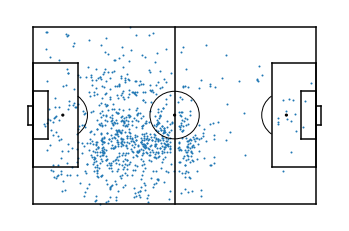

In [6]:
ax = mps.field(show=False)
ax.scatter(pa.start_x,pa.start_y,s=1)

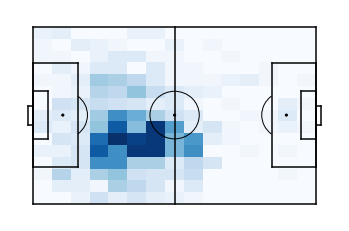

In [7]:
import matplotlib.pyplot as plt
hm = mps.count(pa.start_x,pa.start_y,n=15,m=15)
mps.heatmap(matrix=hm)

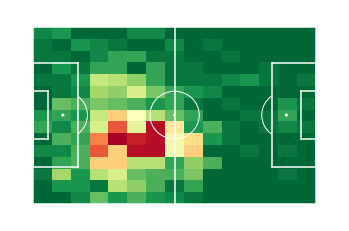

In [10]:
mps.heatmap_green(matrix=hm)